In [4]:
from skimage import color, io, measure, img_as_ubyte, img_as_float
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np

## Read image and histogram

In [3]:
input_path = "data/"
vertebra_path = "vertebra.png"
vertebra_img = io.imread(input_path + vertebra_path)

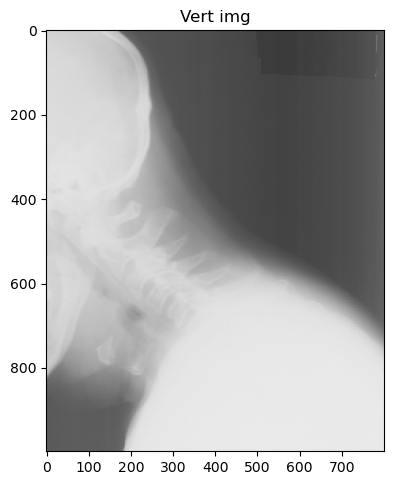

In [5]:
io.imshow(vertebra_img)
plt.title("Vert img")
io.show()

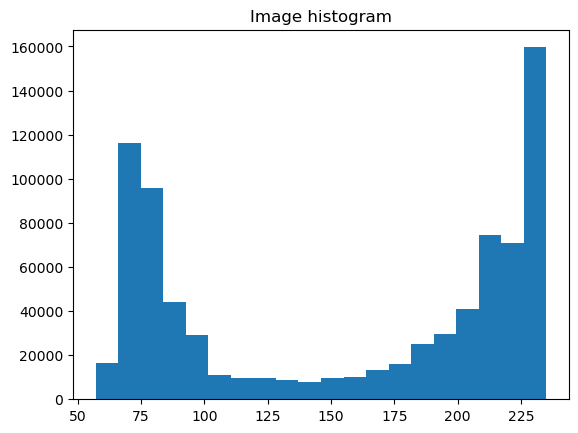

In [6]:
plt.hist(vertebra_img.ravel(), bins=20)
plt.title("Image histogram")
io.show()
# It is a bimodal histogram

In [11]:
max, min = np.max(vertebra_img), np.min(vertebra_img)
max, min

(235, 57)

## Convert image types
As stated above, an (unsigned) float image can have pixel values in [0, 1]. When using the Python skimage function img_as_ubyte on an (unsigned) float image, it will multiply all values with 255 before converting into a byte. Remember that all decimal number will be converted into integers by this, and some information might be lost.

In [12]:
from skimage.util import img_as_float
from skimage.util import img_as_ubyte

In [14]:
float_img = img_as_float(vertebra_img)
np.max(float_img), np.min(float_img)

(0.9215686274509803, 0.22352941176470587)

In [16]:
unsigned_img = img_as_ubyte(vertebra_img)
np.max(unsigned_img), np.min(unsigned_img)

(235, 57)

## Histogram stretching
You should implement a function, that automatically stretches the histogram of an image. In other words, the function should create a new image, where the pixel values are changed so the histogram of the output image is optimal. Here optimal means, that the minimum value is 0 and the maximum value is 255. It should be based on the linear histogram stretching equation:

![formula](data/formula.png)

In [21]:
def histogram_stretch(img: np.array):
    """
    Obtains a histogram stretched image

    Args:
        img (np.array): input image
      
    Return:
        stretch (np.array): newly stretched image
    """
    # Without this:UserWarning: Float image out of standard range; displaying image with stretched contrast.
    #Vlo, hi, cmap = _get_display_range(image)
    img_float = img_as_float(img)
    vmaxd = 1.0
    vmind = 0.0
    vmin = np.min(img_float)
    vmax = np.max(img_float)
    stretch = ((vmaxd - vmind) / (vmax - vmin)) * (img - vmin) + vmind
    return stretch

/home/monkescripts/anaconda3/envs/course02502/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


[]

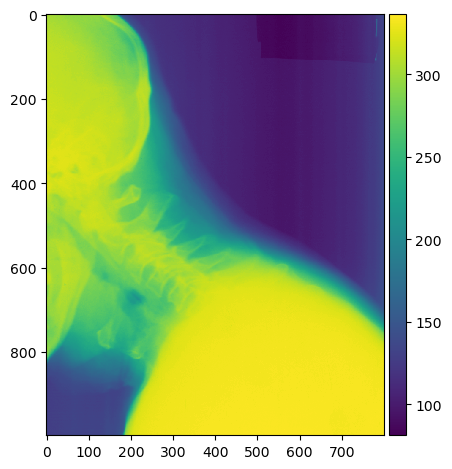

In [22]:
stretch_img = histogram_stretch(vertebra_img)
io.imshow(stretch_img)
plt.plot()